In [1]:
import matplotlib.pyplot as plt
import numpy as np

colors = 2*[c["color"] for c in plt.rcParams["axes.prop_cycle"]]

In [2]:
from hazma.gamma_ray_limits.gamma_ray_limit_parameters import energy_res_comptel
from hazma.gamma_ray_limits.compute_limits import get_detected_spectrum
from hazma.vector_mediator import VectorMediator
from hazma.scalar_mediator import ScalarMediator
from hazma.parameters import neutral_pion_mass as mpi0

In [20]:
def get_tex_label(fs):
    tex_label = r"$"+ fs
    tex_label = tex_label.replace("pi0", "\pi^0")
    tex_label = tex_label.replace("pi pi", "\pi^+ \pi^-")
    tex_label = tex_label.replace("mu mu", "\mu^+ \mu^-")
    tex_label = tex_label.replace("g", "\gamma")
    tex_label = tex_label.replace("e e", "e^+ e^-")
    return tex_label + r"$"

def get_color(fs):
    fss = ["pi0 pi0", "pi pi", "mu mu", "e e", "pi0 g", "g g", "pi0 pi pi", "s s", "v v"]
    return list(plt.rcParams["axes.prop_cycle"])[fss.index(fs)]["color"]

In [15]:
e_p_min, e_p_max, n_e_ps = 5., 300., 1000
e_ps = np.logspace(np.log10(e_p_min), np.log10(e_p_max), n_e_ps)

In [43]:
mx = 250.

sm_args = {"mx": mx, "ms": 400., "gsxx": 1., "gsff": 1., "gsGG": 1., "gsFF": 1.}
sm = ScalarMediator(**sm_args)

vm_args = {"mx": mx, "mv": 1000., "gvxx": 1., "gvuu": 1., "gvdd": 0.2, "gvss": 0., "gvee": 1., "gvmumu": 1.}
vm = VectorMediator(**vm_args)

vx_mw = 1.0e-3  # approximate Milky Way velocity dispersion
e_cm = 2.*vm.mx*(1. + 0.5 * vx_mw**2)

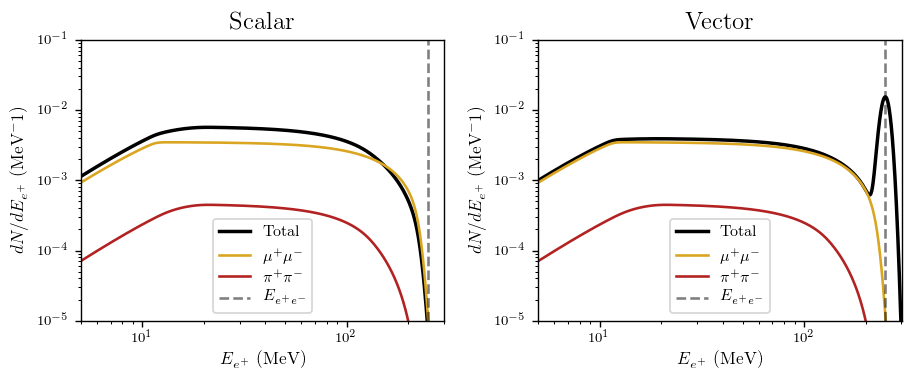

In [46]:
plt.figure(figsize=(7.5, 3.5))

### Scalar mediator
plt.subplot(1, 2, 1)
# Plot total convolved spectrum
dnde_det = get_detected_spectrum(lambda es, e_cm: sm.positron_spectra(es, e_cm)["total"],
                                 sm.positron_lines,
                                 e_p_min, e_p_max, e_cm,
                                 energy_res=energy_res_comptel)
plt.plot(e_ps, dnde_det(e_ps), linewidth=2., label="Total", color="k")

# Plot convolved spectrum for relevant final states
for fs in ["mu mu", "pi pi"]:
    dnde_det = get_detected_spectrum(lambda es, e_cm: vm.positron_spectra(es, e_cm)[fs],
                                     lambda e_cm: {},
                                     e_p_min, e_p_max, e_cm,
                                     energy_res=energy_res_comptel)
    plt.plot(e_ps, dnde_det(e_ps), label=get_tex_label(fs), color=get_color(fs), linewidth=1.5)
    
plt.axvline(sm.positron_lines(e_cm)["e e"]["energy"], linestyle='--', color="k", alpha=0.5, linewidth=1.5, label=r"$E_{e^+ e^-}$")

plt.xlabel(r"$E_{e^+}$ (MeV)")
plt.ylabel(r"$dN/dE_{e^+}$ (MeV$^-1$)")
plt.xscale("log")
plt.yscale("log")
plt.xlim(e_ps[[0, -1]])
plt.ylim(1e-5, 1e-1)
plt.legend()
plt.title("Scalar")

### Vector mediator
plt.subplot(1, 2, 2)
# Plot total convolved spectrum
dnde_det = get_detected_spectrum(lambda es, e_cm: vm.positron_spectra(es, e_cm)["total"],
                                 vm.positron_lines,
                                 e_p_min, e_p_max, e_cm,
                                 energy_res=energy_res_comptel)
plt.plot(e_ps, dnde_det(e_ps), linewidth=2., label="Total", color="k")

# Plot convolved spectrum for relevant final states
for fs in ["mu mu", "pi pi"]:
    dnde_det = get_detected_spectrum(lambda es, e_cm: vm.positron_spectra(es, e_cm)[fs],
                                     lambda e_cm: {},
                                     e_p_min, e_p_max, e_cm,
                                     energy_res=energy_res_comptel)
    plt.plot(e_ps, dnde_det(e_ps), label=get_tex_label(fs), color=get_color(fs), linewidth=1.5)
    
plt.axvline(vm.positron_lines(e_cm)["e e"]["energy"], linestyle='--', color="k", alpha=0.5, linewidth=1.5, label=r"$E_{e^+ e^-}$")

plt.xlabel(r"$E_{e^+}$ (MeV)")
plt.ylabel(r"$dN/dE_{e^+}$ (MeV$^-1$)")
plt.xscale("log")
plt.yscale("log")
plt.xlim(e_ps[[0, -1]])
plt.ylim(1e-5, 1e-1)
plt.legend()
plt.title("Vector")

### Save the figure
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # remove some of the space between plots
plt.savefig("figures/positron_spectra.pdf")